In [1]:
import json
import matplotlib.pyplot as plt
# load all the different results

with open("hyperparam_results_fixed.json", "r") as f:
    data = json.load(f)


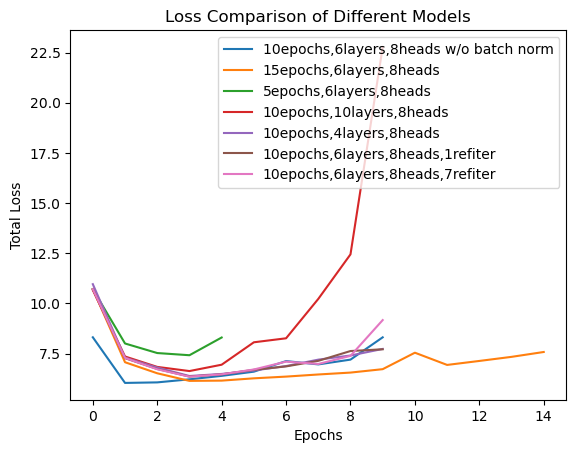

In [14]:
# load loss arrays from results, MUST BE THE "nonfixed" hyperparameter results as new one doesnt have loss arrays

for model_name, params in data.items():
    loss_array = params["loss_array"]
    # Extract first element from each inner list
    loss_values = [x[0] for x in loss_array]
    if(model_name == '10epochs,6layers,8heads'):
        model_name = model_name + ' w/o batch norm'
    plt.plot(loss_values, label=model_name)
    plt.legend()
    plt.title('Loss Comparison of Different Models')
    plt.xlabel('Epochs')
    plt.ylabel('Total Loss')

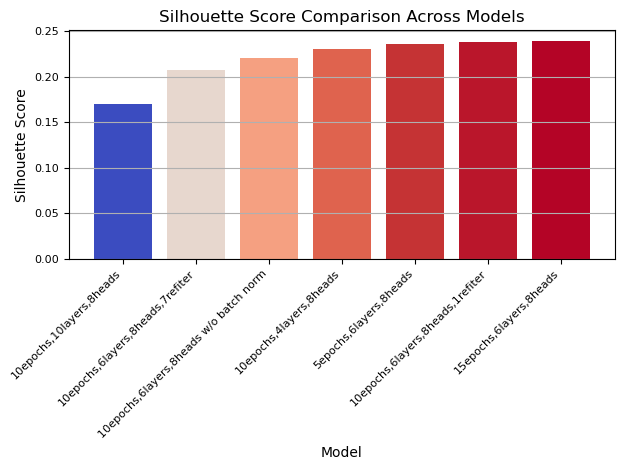

In [34]:
# COMPARE SILHOUETTE SCORE BETWEEN MODELS

# Initialize lists
model_names = []
scores = []
model_scores = []

# Loop through each model in the data
for model_name, params in data.items():
    score = params["silhouette_score"]
    
    # Modify model name if condition is met
    if model_name == '10epochs,6layers,8heads':
        model_name = model_name + ' w/o batch norm'
    
    # Append model name and score to model_scores
    model_scores.append([model_name, score])

# Sort model_scores based on score (ascending)
model_scores.sort(key=lambda x: x[1])

# Unzip the sorted model_scores into model_names_sorted and scores
model_names_sorted, scores_sorted = zip(*model_scores)
norm = plt.Normalize(min(scores_sorted), max(scores_sorted))
cmap = plt.get_cmap("coolwarm")  # You can choose other color maps like 'plasma', 'inferno', etc.

# Plotting
bars = plt.bar(model_names_sorted, scores_sorted, color=cmap(norm(scores_sorted)))
plt.xlabel("Model")
plt.ylabel("Silhouette Score")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.title("Silhouette Score Comparison Across Models")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

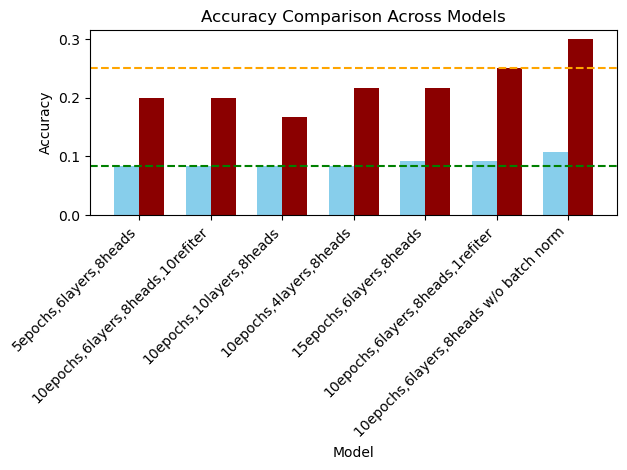

In [28]:
import numpy as np
# CALCULATE TOP-1 AND TOP-3 ACCURACY FOR EACH MODEL AND COMPARE
# Initialize lists
model_names = []
accuracy = []
top3_accuracy = []
model_scores = []

# Loop through each model in the data
for model_name, params in data.items():
    score = params["accuracy"]
    score_3 = params["top-3 accuracy"]
    
    # Modify model name if condition is met
    if model_name == '10epochs,6layers,8heads':
        model_name = model_name + ' w/o batch norm'
    
    # Append model name and scores to model_scores
    model_scores.append([model_name, score, score_3])

# Sort model_scores based on accuracy (ascending)
model_scores.sort(key=lambda x: x[1])

# Unzip the sorted model_scores into model_names_sorted, accuracy_sorted, and top3_accuracy_sorted
model_names_sorted, accuracy_sorted, top3_accuracy_sorted = zip(*model_scores)

# Set up the positions for the bars
bar_width = 0.35  # The width of the bars
index = np.arange(len(model_names_sorted))  # The x positions for the models

# Create a color map based on the accuracy scores
norm = plt.Normalize(min(accuracy_sorted), max(accuracy_sorted))
cmap = plt.get_cmap("coolwarm")  # You can choose other color maps like 'plasma', 'inferno', etc.
cmap3 = plt.get_cmap("viridis")
# Plotting the bars
fig, ax = plt.subplots()

# Bars for accuracy
bar1 = ax.bar(index - bar_width / 2, accuracy_sorted, bar_width, label="Accuracy", color='skyblue')

# Bars for top-3 accuracy
bar2 = ax.bar(index + bar_width / 2, top3_accuracy_sorted, bar_width, label="Top-3 Accuracy", color='darkred')

# Adding labels and title
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Comparison Across Models")
ax.set_xticks(index)
ax.set_xticklabels(model_names_sorted, rotation=45, ha="right")
plt.axhline(y = 0.08333, color='green',linestyle='--',label='Top-1 Random Baseline')
plt.axhline(y = 0.25, color='orange',linestyle='--',label='Top-3 Random Baseline')
# Add grid for better readability

# Add a color bar

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

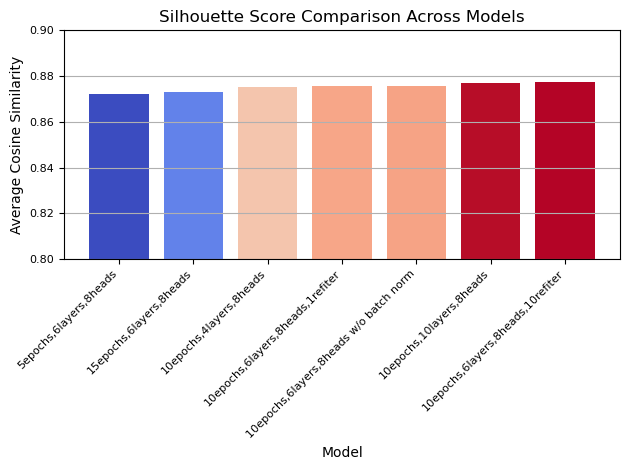

In [3]:
# Initialize lists
model_names = []
scores = []
model_scores = []
# READS AVERAGE COSINE SIMILARITY FROM EACH MODEL AND COMPARES
# must be from "non fixed" hyperparam results as we stopped using this as a useful metric

# Loop through each model in the data
for model_name, params in data.items():
    score = params["average cosine similarity"]
    
    # Modify model name if condition is met
    if model_name == '10epochs,6layers,8heads':
        model_name = model_name + ' w/o batch norm'
    
    # Append model name and score to model_scores
    model_scores.append([model_name, score])

# Sort model_scores based on score (ascending)
model_scores.sort(key=lambda x: x[1])

# Unzip the sorted model_scores into model_names_sorted and scores
model_names_sorted, scores_sorted = zip(*model_scores)
norm = plt.Normalize(min(scores_sorted), max(scores_sorted))
cmap = plt.get_cmap("coolwarm")  # You can choose other color maps like 'plasma', 'inferno', etc.

# Plotting
bars = plt.bar(model_names_sorted, scores_sorted, color=cmap(norm(scores_sorted)))
plt.xlabel("Model")
plt.ylabel("Average Cosine Similarity")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.title("Average Cosine Similarity Comparison Across Models")
plt.grid(axis="y")
plt.ylim([0.8,0.9])
plt.tight_layout()
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

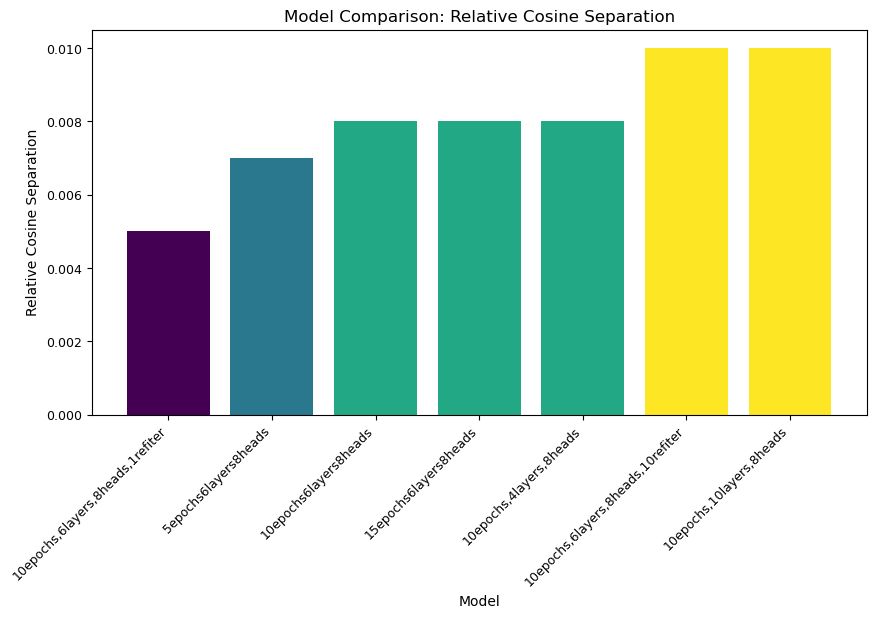

In [4]:
#CALCULATE RELATIVE COSINE SIMIlARITY SCORES AND COMPARE BETWEEN MODELS
# we were too lazy to have it load from the files and just hardcoded this, however you can def have it read if you want
model_scores = {
  '10epochs6layers8heads': 0.008,
  '15epochs6layers8heads':0.008,
  '5epochs6layers8heads': 0.007,
  '10epochs,6layers,8heads,1refiter': 0.005,
  '10epochs,6layers,8heads,10refiter' :0.010,
  '10epochs,10layers,8heads': 0.010,
  '10epochs,4layers,8heads': 0.008
}
# new results
# 10epochs6layers8heads 0.008 ± 0.011
# 15epochs6layers8heads 0.008 ± 0.010
# 5epochs6layers8heads 0.007 ± 0.010
# 10epochs,6layers,8heads,1refiter 0.005 ± 0.010
# 10epochs,6layers,8heads,10refiter 0.010 ± 0.010
# 10epochs,10layers,8heads 0.010 ± 0.011
# 10epochs,4layers,8heads 0.008 ± 0.010
# old results
# 10epochs6layers8heads 0.010 ± 0.010
# 15epochs6layers8heads 0.008 ± 0.010
# 5epochs6layers8heads 0.007 ± 0.010
# 10epochs,6layers,8heads,1refiter 0.005 ± 0.010
# 10epochs,6layers,8heads,10refiter 0.010 ± 0.010
# 10epochs,10layers,8heads 0.010 ± 0.011
# 10epochs,4layers,8heads 0.008 ± 0.010

sorted_models = sorted(model_scores.items(), key=lambda x: x[1])
model_names, scores = zip(*sorted_models)

# Create colormap
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(scores), max(scores))
colors = cmap(norm(scores))

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, scores, color=colors)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel("Model")
plt.ylabel("Relative Cosine Separation")
plt.title("Model Comparison: Relative Cosine Separation")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Separation Score")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()